<a href="https://colab.research.google.com/github/Sagargv2611/Image-caption-generator/blob/main/clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Project

## 1. Data Prep

In [ ]:
# a. Read in the data file wholesale_clients.csv
import pandas as pd

data = pd.read_csv('/content/wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
data = data.iloc[:, 2:]
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
# c. Note the number of rows and columns
data.shape

(440, 6)

In [ ]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
# e. Double check that all the column means are 0 and standard deviations are 1
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## 2. K-Means Clustering

In [ ]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

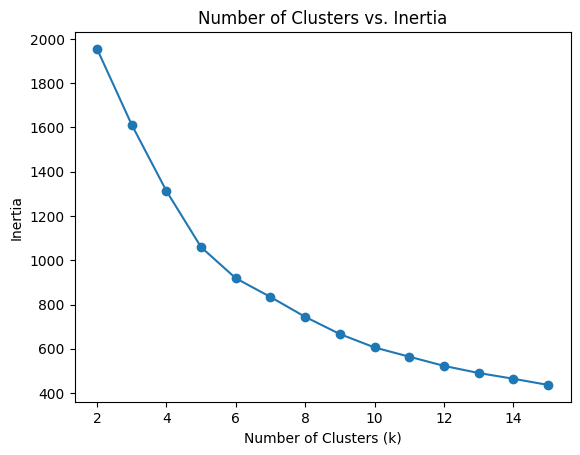

In [ ]:
# b. Create an inertia plot

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans5.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [ ]:
# d. Find the number of clients in each cluster
from collections import Counter

Counter(kmeans5.labels_)

Counter({np.int32(3): 272,
         np.int32(0): 96,
         np.int32(1): 59,
         np.int32(2): 11,
         np.int32(4): 2})

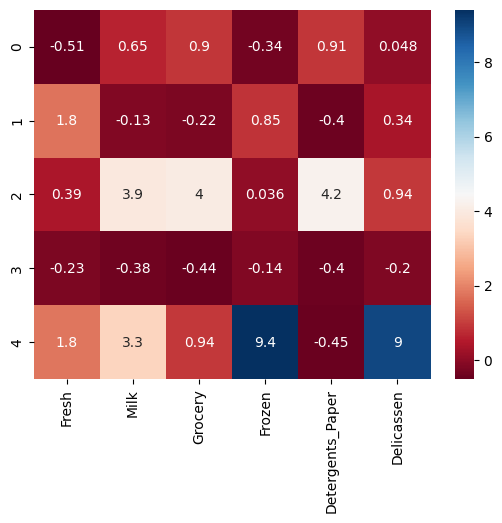

In [ ]:
# e. Create a heat map of the cluster centers
import seaborn as sns

cluster_centers5 = pd.DataFrame(kmeans5.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers5, cmap='RdBu', annot=True);

In [ ]:
# f. Name the clusters

* Cluster 0: **More Milk, Grocery and Paper Items**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More of Everything**
* Cluster 3: **Little of Everything**
* Cluster 4: **Lots of Frozen + Deli Items**

In [ ]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot

from sklearn.metrics import silhouette_score

# create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_, metric='euclidean', sample_size=None))

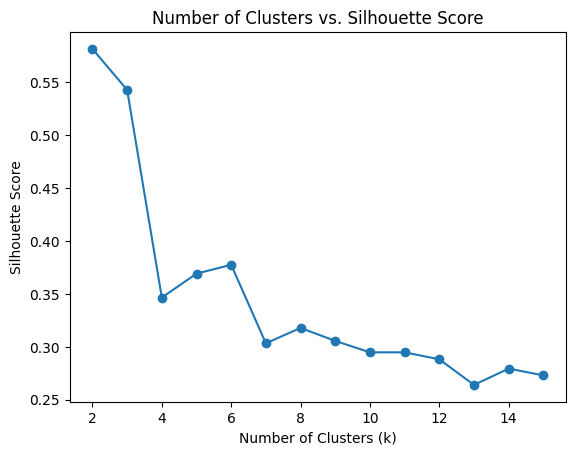

In [ ]:
# plot the silhouette scores

# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

In [ ]:
# h. Extra credit: fit two models with the number of clusters for the two highest silhouette scores and name the clusters

In [ ]:
# fit a kmeans model with 2 clusters
kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans2.fit(data_scaled)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# data points within each cluster
Counter(kmeans2.labels_)

Counter({np.int32(0): 373, np.int32(1): 67})

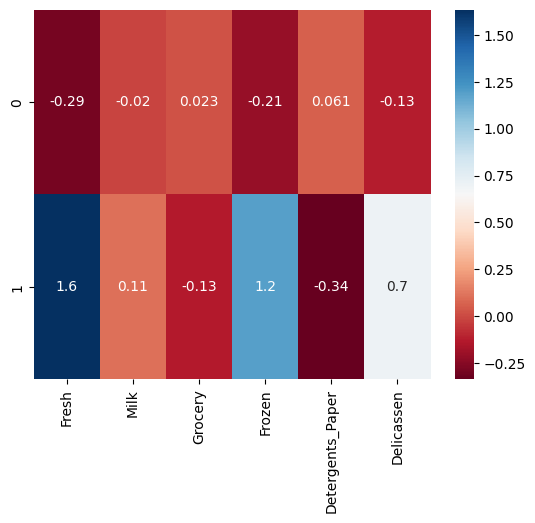

In [ ]:
# view the cluster centers
cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**

In [ ]:
# fit a kmeans model with 3 clusters
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# data points within each cluster
Counter(kmeans3.labels_)

Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})

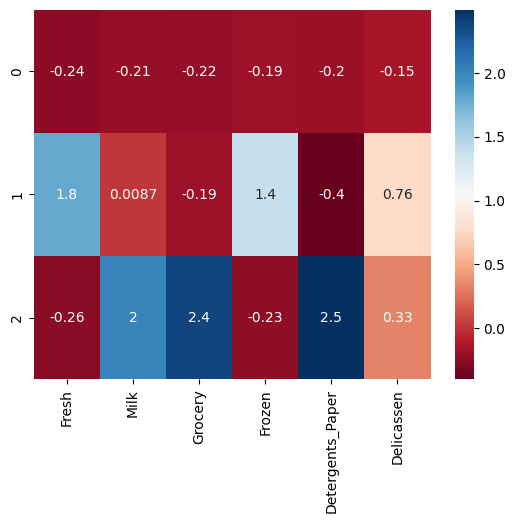

In [ ]:
# view the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh, Frozen and Deli Items**
* Cluster 2: **More Milk, Grocery and Paper Items**

## 3. Hierarchical Clustering

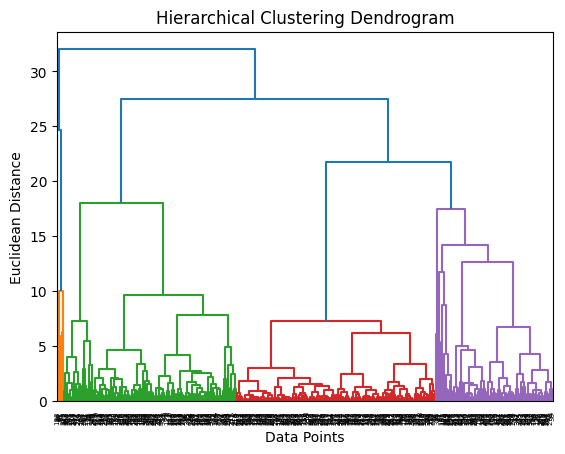

In [ ]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward')
dendrogram_info = dendrogram(linkage_matrix, color_threshold=20)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary: there seem to be 5 clusters

In [ ]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster
from sklearn.cluster import AgglomerativeClustering

agg5 = AgglomerativeClustering(5)
agg5.fit(data_scaled)

Counter(agg5.labels_)

Counter({np.int64(0): 153,
         np.int64(4): 177,
         np.int64(2): 104,
         np.int64(1): 5,
         np.int64(3): 1})

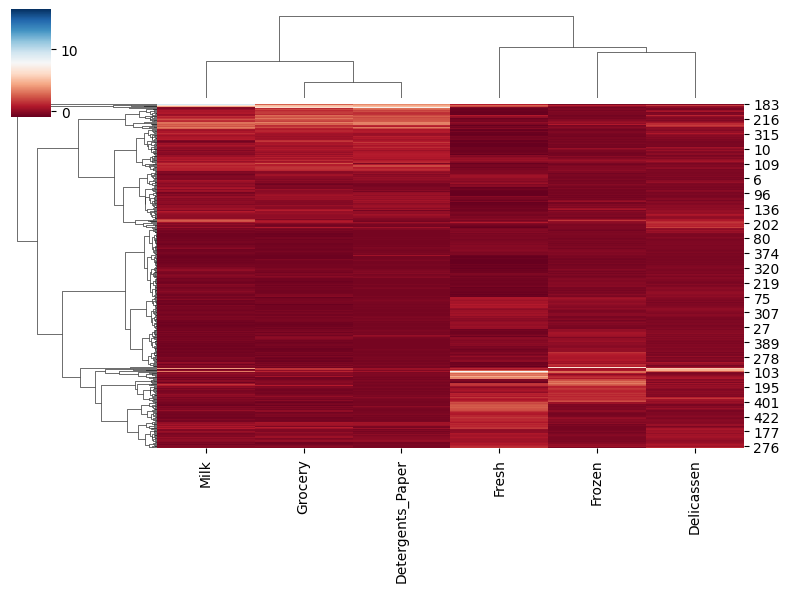

In [ ]:
# d. Create a cluster map of the model you just fit
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

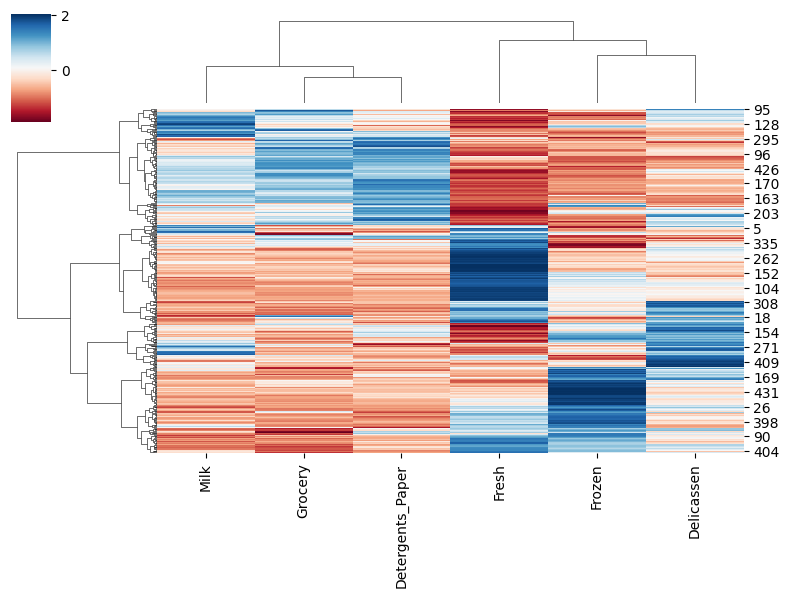

In [ ]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns, z_score=0)
plt.show()

In [ ]:
# update scaled dataframe so that each row has a mean of 0 and standard deviation of 1

# calculate mean and standard deviation for each row
row_means = data_scaled.mean(axis=1)
row_stds = data_scaled.std(axis=1)

# divide each element in the row by the standard deviation
data_zscore = data_scaled.sub(row_means, axis=0).div(row_stds, axis=0)
data_zscore.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.226470,1.554663,-0.038946,-1.586185,-0.045871,-0.110132
1,-1.285281,1.515302,0.395561,-0.922651,0.144427,0.152640
2,-0.838979,0.048198,-0.404631,-0.518050,-0.237279,1.950740
3,0.417555,-1.050725,-0.582252,1.607848,-0.796394,0.403969
4,0.846251,-0.619745,-0.664022,-0.248161,-0.914577,1.600254


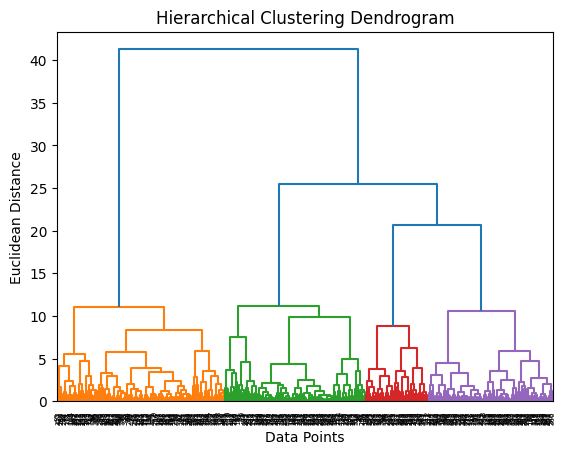

In [ ]:
# update the dendrogram
linkage_matrix_zscore = linkage(data_zscore, method='ward')
dendrogram_info_zscore = dendrogram(linkage_matrix_zscore, color_threshold=15)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance");

In [ ]:
# check if the cluster map data points match the dendrogram
data_points = pd.Series(dendrogram_info['ivl'], name='Data Point').astype('int')
data_points.head()

,Data Point
0,183
1,86
2,47
3,61
4,85


In [ ]:
# check if the cluster map data points match the dendrogram
data_points_zscore = pd.Series(dendrogram_info_zscore['ivl'], name='Data Point').astype('int')
data_points_zscore.head()

,Data Point
0,95
1,317
2,430
3,184
4,266


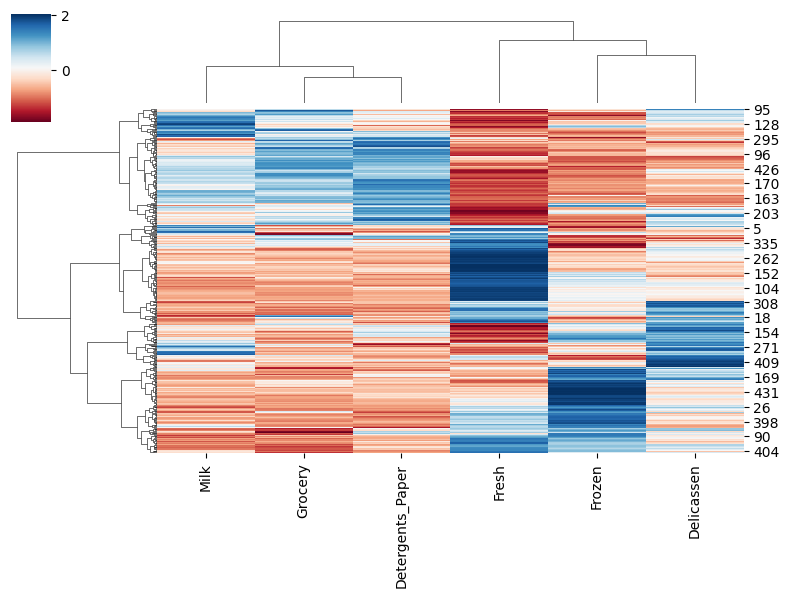

In [ ]:
# cluster map 1: data scaled and z_score = 0
sns.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns, z_score=0)
plt.show()

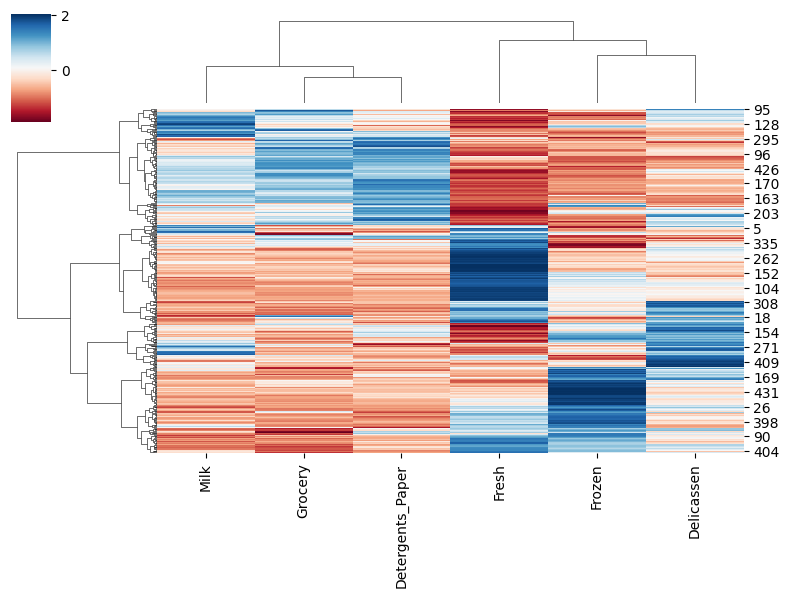

In [ ]:
# cluster map 2: data_zscore without z_score parameter
sns.clustermap(data_zscore, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data_scaled.columns)
plt.show()

* Cluster A: **Less Fresh Items**
* Cluster B: **More Fresh Items**
* Cluster C: **More Deli Items**
* Cluster D: **More Frozen Items**

In [ ]:
# update the agg model with the cluster number and new data set
agg4_zscore = AgglomerativeClustering(4)
agg4_zscore.fit(data_zscore)

Counter(agg4_zscore.labels_)

Counter({np.int64(0): 125,
         np.int64(1): 149,
         np.int64(3): 56,
         np.int64(2): 110})

In [ ]:
# f. Extra credit: Write a loop to view the silhouette score for 2 to 20 clusters
agg_silhouette_scores = {}

for n in range(2, 21):
    agg_n = AgglomerativeClustering(n)
    agg_n.fit(data_scaled)
    agg_ss = silhouette_score(data_scaled, agg_n.labels_, metric='euclidean', sample_size=None)
    agg_silhouette_scores[n] = agg_ss

agg_silhouette_scores

{2: np.float64(0.7924572758342273),
 3: np.float64(0.2646091480214908),
 4: np.float64(0.2670148241989557),
 5: np.float64(0.23988371669170097),
 6: np.float64(0.23424990872738188),
 7: np.float64(0.24405686464597856),
 8: np.float64(0.2520384687343341),
 9: np.float64(0.27202620570114383),
 10: np.float64(0.27954261064916225),
 11: np.float64(0.28015398902140587),
 12: np.float64(0.24562381160303043),
 13: np.float64(0.24647695283235932),
 14: np.float64(0.22903049767293357),
 15: np.float64(0.2308407937114372),
 16: np.float64(0.18896719179943278),
 17: np.float64(0.1959949281863608),
 18: np.float64(0.1954950889983609),
 19: np.float64(0.20219343087967662),
 20: np.float64(0.20160566549699505)}

In [ ]:
# g. Extra credit: Fit a model with the number of clusters for the highest silhouette score
agg2 = AgglomerativeClustering(2)
agg2.fit(data_scaled)

Counter(agg2.labels_)

Counter({np.int64(0): 434, np.int64(1): 6})

## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters

In [ ]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [ ]:
print_metrics(kmeans3, data_scaled) # differentiated, simple and interpretable

KMeans(n_clusters=3, random_state=42)
Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})
0.4582633767207058


In [ ]:
print_metrics(kmeans5, data_scaled) # decent model

KMeans(n_clusters=5, random_state=42)
Counter({np.int32(3): 272, np.int32(0): 96, np.int32(1): 59, np.int32(2): 11, np.int32(4): 2})
0.36890127429678043


In [ ]:
print_metrics(agg2, data_scaled) # very few differentiated points

AgglomerativeClustering()
Counter({np.int64(0): 434, np.int64(1): 6})
0.7924572758342273


In [ ]:
print_metrics(agg5, data_scaled) # mainly three clusters

AgglomerativeClustering(n_clusters=5)
Counter({np.int64(4): 177, np.int64(0): 153, np.int64(2): 104, np.int64(1): 5, np.int64(3): 1})
0.23988371669170097


In [ ]:
# extra model with zscore calculation
print_metrics(agg4_zscore, data_zscore) # decent model

AgglomerativeClustering(n_clusters=4)
Counter({np.int64(1): 149, np.int64(0): 125, np.int64(2): 110, np.int64(3): 56})
0.3427681898594439


## 6. Recommend Client Segments

In [ ]:
# a. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# data points within each cluster
Counter(kmeans3.labels_)

Counter({np.int32(0): 350, np.int32(1): 53, np.int32(2): 37})

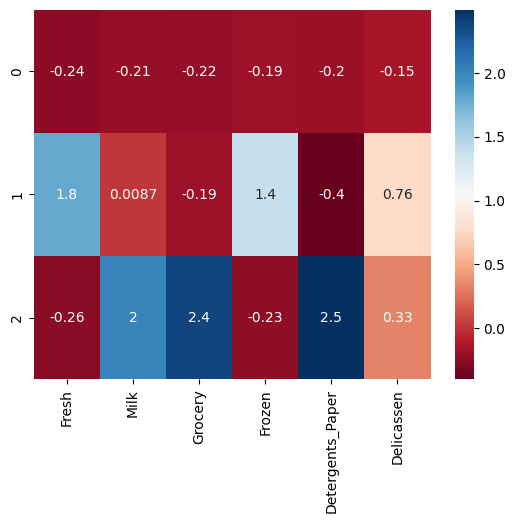

In [ ]:
# view the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

Name the clusters:

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More Milk, Grocery and Paper Items**

In [ ]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients

* **Typical clients**: make sure our sales team is knowledgeable about a variety of products
* **Clients who purchase a lot of fresh and frozen foods**: make sure to prioritize these clients when shipping them fresh foods
* **Clients who purchase a lot of milk, grocery, detergents and paper items**: make sure to keep them up to date on new non-perishable items

## 7. Predict the Cluster of a New Client

In [ ]:
# a. Given this new client, determine which cluster they fall into
import numpy as np
new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])], columns=data.columns)
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [ ]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(scaler.transform(new_client), columns=data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [ ]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_scaled)

array([2], dtype=int32)

Remember the clusters:

* Cluster 0: **Typical Clients**
* Cluster 1: **More Fresh and Frozen Items**
* Cluster 2: **More Milk, Grocery and Paper Items**